In [1]:
!pip install -U kaleido

In [2]:
import glob
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [3]:
dfs=[]
folder = '/content/drive/MyDrive/GoogleTrendsDC/prices/'

for file in glob.glob(folder + '*.csv'):

    # Get filename without extension
    filename = file.split('.')[0][int(len(folder)):int(len(folder)+3)]

    # Read csv into DataFrame
    df = pd.read_csv(file)

    # Set DataFrame name
    df_name = filename

    # Assign DataFrame to a variable with filename as name
    globals()[df_name] = df

    dfs.append(df_name)

    # Convert 'Date' dtype to datetime
    for i in dfs:
      df = globals()[i]
      df['Date'] = df['Date'].astype('str').apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [4]:
len(dfs)

20

In [5]:
# Sort DataFrames using mean
avg = []
for i in dfs:
  df = globals()[i]
  md = [i,df['Volume'].mean()]
  avg.append(md)

sorted_avg = sorted(avg, key=lambda x: x[1], reverse=True)
dfs = [i[0] for i in sorted_avg]

In [6]:
# Plot chart
fig = px.line()

for i in dfs[:5]:
  df = globals()[i]
  melted = pd.melt(df, id_vars=['Date'], value_vars=['Volume'])

  melted['color'] = i

  # plot melted dataframe
  trace = go.Scatter(
    x=melted['Date'],
    y=melted['value'],
    mode='lines',
    name=i
  )

  fig.add_trace(trace)

In [7]:
# Set title and labels
fig.update_layout(
  title='Trend comparison of Volume(Top 5 coins)',
  xaxis_title='Date',
  yaxis_title='Volume[USD]'
)
fig.write_image('Trend comparison of Volume(Top 5 coins).png')
fig.show()

In [8]:
# Plot chart
fig = px.line()

for i in dfs[15:]:
  df = globals()[i]
  melted = pd.melt(df, id_vars=['Date'], value_vars=['Volume'])

  melted['color'] = i

  # plot melted dataframe
  trace = go.Scatter(
    x=melted['Date'],
    y=melted['value'],
    mode='lines',
    name=i
  )

  fig.add_trace(trace)

In [9]:
# Set title and labels
fig.update_layout(
  title='Trend comparison of Volume(Bottom 5 coins)',
  xaxis_title='Date',
  yaxis_title='Volume[USD]'
)
fig.write_image('Trend comparison of Volume(Bottom 5 coins).png')
fig.show()

In [10]:
# Sort DataFrames using mean
avgPrice = []
for i in dfs:
  df = globals()[i]
  md = [i,df['Close'].mean()]
  avgPrice.append(md)

sorted_avgPrice = sorted(avgPrice, key=lambda x: x[1], reverse=True)
dfPrice = [i[0] for i in sorted_avgPrice]

In [11]:
# Plot chart
fig = px.line()

for i in dfPrice[:5]:
  df = globals()[i]
  melted = pd.melt(df, id_vars=['Date'], value_vars=['Close'])

  melted['color'] = i

  # plot melted dataframe
  trace = go.Scatter(
    x=melted['Date'],
    y=melted['value'],
    mode='lines',
    name=i
  )

  fig.add_trace(trace)

In [12]:
# Set title and labels
fig.update_layout(
  title='Trend comparison of Daily Price(Top 5 coins)',
  xaxis_title='Date',
  yaxis_title='Price[USD]'
)
fig.write_image('Trend comparison of Daily Price(Top 5 coins).png')
fig.show()

In [13]:
# Plot chart
fig = px.line()

for i in dfPrice[14:]:
  df = globals()[i]
  melted = pd.melt(df, id_vars=['Date'], value_vars=['Close'])

  melted['color'] = i

  # plot melted dataframe
  trace = go.Scatter(
    x=melted['Date'],
    y=melted['value'],
    mode='lines',
    name=i
  )

  fig.add_trace(trace)

In [14]:
# Set title and labels
fig.update_layout(
  title='Trend comparison of Daily Price(Bottom 6 coins)',
  xaxis_title='Date',
  yaxis_title='Price[USD]'
)
fig.write_image('Trend comparison of Daily Price(Bottom 6 coins).png')
fig.show()

In [15]:
trends=[]
folder = '/content/drive/MyDrive/GoogleTrendsDC/trends/'

for file in glob.glob(folder + '*.csv'):

    # Get filename without extension
    filename = file.split('.')[0][int(len(folder)):int(len(folder)+3)]

    # Read csv into DataFrame
    df = pd.read_csv(file).reset_index()

    # Rename cols
    df.rename(columns={'index':'Week',
                       'Category: All categories':'Trends'}, inplace=True)

    # Drop rows and cols
    df.drop(labels=0, inplace=True)
    df.reset_index(inplace=True)
    df.drop(columns=df.columns[0], inplace=True)

    # Update col dtypes
    try:
      df[df.columns[1]] = df[df.columns[1]].replace('<1', '0').astype('int')
    except ValueError:
      print(f'skipping{file} due to non-numeric values')
      continue
    df[df.columns[0]] = df[df.columns[0]].astype('str').apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Set DataFrame name
    df_name = filename

    # Assign DataFrame to a variable with filename as name
    globals()[df_name] = df

    trends.append(df_name)

In [16]:
len(trends)

20

In [17]:
# Sort DataFrames using mean
avgTrends = []
for i in trends:
  df = globals()[i]
  md = [i,df[df.columns[1]].mean()]
  avgTrends.append(md)

sorted_avgTrends = sorted(avgTrends, key=lambda x: x[1], reverse=True)
dfTrends = [i[0] for i in sorted_avgTrends]

In [18]:
# Plot chart
fig = px.line()

for i in dfTrends[:5]:
  df = globals()[i]
  melted = pd.melt(df, id_vars=['Week'], value_vars=['Trends'])

  melted['color'] = i

  # plot melted dataframe
  trace = go.Scatter(
    x=melted['Week'],
    y=melted['value'],
    mode='lines',
    name=i
  )

  fig.add_trace(trace)

In [19]:
# Set title and labels
fig.update_layout(
  title='Trend comparison of Weekly Trends(Top 5 coins)',
  xaxis_title='Date',
  yaxis_title='Trends'
)
fig.write_image('Trend comparison of Weekly Trends(Top 5 coins).png')
fig.show()

In [20]:
# Matching trends and prices dataframe list
mapping = {
    'BTC':'bit','ETH':'eth',
    'XRP':'xrp','LTC':'lit',
    'SOL':'sol','ADA':'car',
    'DOT':'pol','DOG':'dog',
    'BNB':'bnb','LIN':'cha',
    'UNI':'uni','FIL':'fil',
    'XMR':'mon','CAK':'pan',
    'XTZ':'tez','ROS':'oas',
    'FET':'fet','OCE':'oce',
    'AGI':'sin','KCS':'kuc'
}
ordered = [mapping[i] for i in dfs]

In [21]:
mergeddfs = []
# Merge prices to trends
dfs_dict = {name:globals()[name] for name in dfs}
ordered_dict = {name:globals()[name] for name in ordered}

for trend, price in zip(ordered_dict, dfs_dict):
  # Access df
  trend_df = ordered_dict[trend]
  price_df = dfs_dict[price]
  # merged df name
  dfname = f'{price}_'

  try:
    # Merge
    Merged = trend_df.merge(price_df, left_on='Week', right_on='Date')

  except KeyError:
    print(f"Merge error for {trend}")
    continue

  # Rename merge
  globals()[dfname] = Merged
  mergeddfs.append(dfname)

In [22]:
# Correlation: Trends vs Price
corr = {}
for i in mergeddfs:
  df = globals()[i]
  # Calculate correlation
  corrDict = {i:df['Trends'].corr(df['Close'])}
  corr.update(corrDict)

# Create a series for correlation
corrdf = pd.Series(corr).sort_values()

# Plot correlations
fig = px.bar(
    x = corrdf.tail(10),
    y = corrdf.tail(10).index,
    title = 'Correlation(Top 10): Google Trend vs Price(USD)'
)
fig.update_layout(xaxis_title='Correlation(Trend vs Price)', yaxis_title='Token')
fig.write_image('Correlation(Top 10): Google Trend vs Price(USD).png')
fig.show()

In [23]:
# Plot correlations
fig = px.bar(
    x = corrdf.head(10),
    y = corrdf.head(10).index,
    title = 'Correlation(Bottom 10): Google Trend vs Price(USD)'
)
fig.update_layout(xaxis_title='Correlation(Trend vs Price)', yaxis_title='Token')
fig.write_image('Correlation(Bottom 10): Google Trend vs Price(USD).png')
fig.show()

In [24]:
# Explore Ideal time lags
def calculate_lag_correlations(mergeddfs, max_lag=25):
    coin_correlations = {}
    for i in mergeddfs:
        df = globals()[i]
        df = df[['Week', 'Trends', 'Close']].set_index('Week')
        correlations = {}
        for lag in range(1, max_lag + 1):
            trends_lagged = df['Trends'].shift(lag)
            correlation = df['Close'].corr(trends_lagged)
            correlations[lag] = correlation
        coin_correlations[i] = correlations
    return coin_correlations

In [25]:
coin_correlations = calculate_lag_correlations(mergeddfs)

In [26]:
len(coin_correlations)

20

In [27]:
h = pd.DataFrame(coin_correlations)
h = h.T

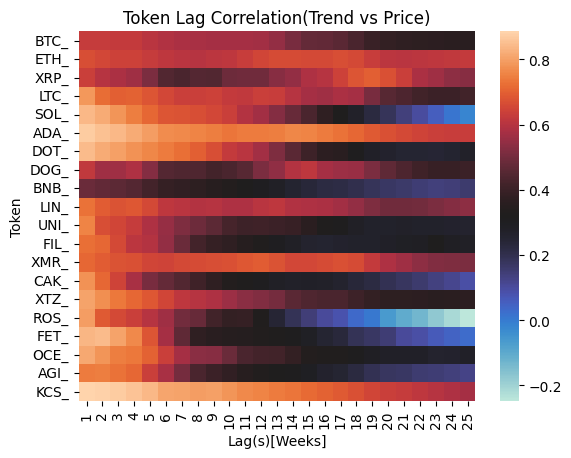

In [28]:
sns.heatmap(h, cmap='icefire')
plt.xlabel('Lag(s)[Weeks]')
plt.ylabel('Token')
plt.title('Token Lag Correlation(Trend vs Price)')
plt.savefig('Token Lag Correlation(Trend vs Price).png')
plt.show();

In [29]:
# Examine token trend correlations
def token_trendcorr(trends):
  trendcorr = {}

  for i in trends:
    for j in trends:
      df = globals()[i]
      df = df.set_index('Week')

      df1 = globals()[j]
      df1 = df1.set_index('Week')

      corr = df['Trends'].corr(df1['Trends'])
      trendcorr[f"{i}_{j}"] = corr

  return trendcorr


In [30]:
tdf = token_trendcorr(trends)

In [31]:
tdf = pd.Series(tdf).reset_index()

In [32]:
chunks = []

for i in range(0, 381, 20):

  expp = tdf[i:i+20]

  try:
    expp = expp.set_index(expp['index'].str[-3:])

    expp.rename(columns={0:expp['index'].str[:3][0]}, inplace=True)
    expp.drop(columns=expp.columns[0], inplace=True)

  except IndexError:
    print(i)


  chunks.append(expp)

exp = pd.concat(chunks, axis=1)

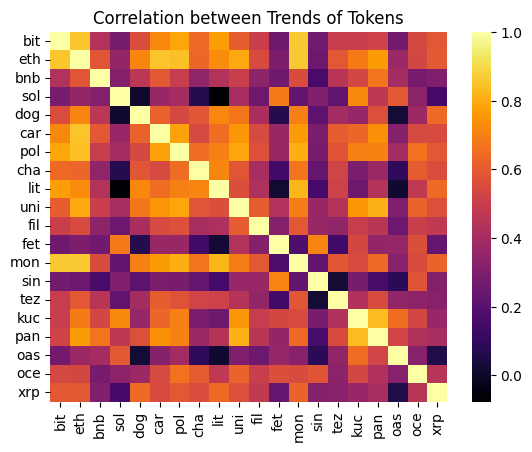

In [33]:
sns.heatmap(exp, cmap='inferno')
plt.ylabel('')
plt.title('Correlation between Trends of Tokens')
plt.savefig('Correlation between Trends of Tokens.png')
plt.show();

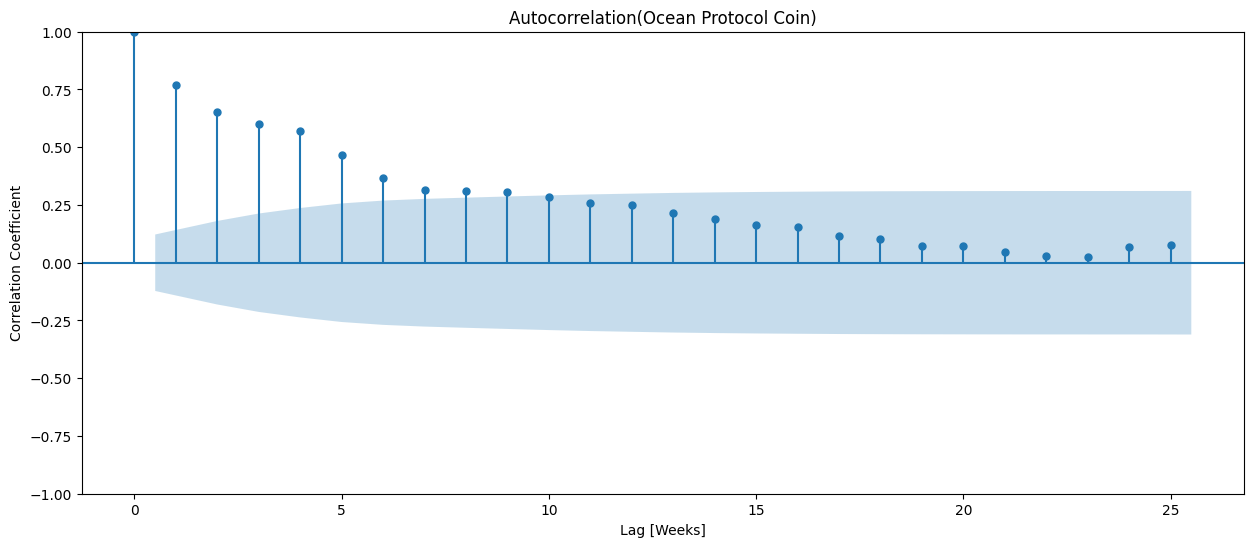

In [34]:
# Visual Inspection of PACF/ACF

y = OCE_[['Week', 'Trends']].set_index('Week')
y.index = y.index.map(pd.Timestamp)
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [Weeks]")
plt.ylabel("Correlation Coefficient")
plt.title('Autocorrelation(Ocean Protocol Coin)');

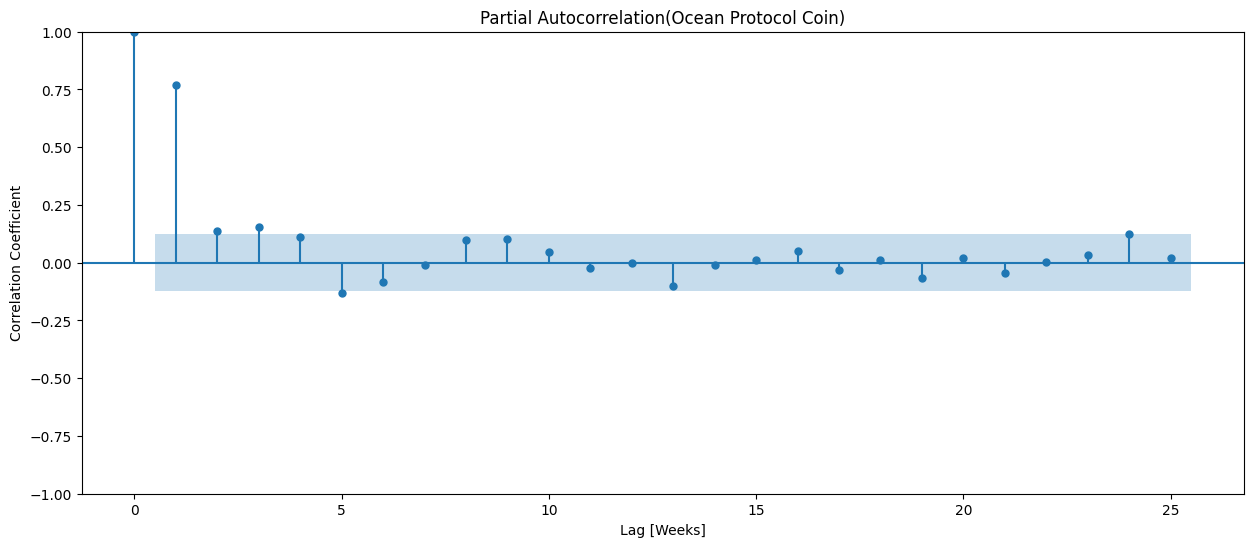

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax=ax)
plt.xlabel("Lag [Weeks]")
plt.ylabel("Correlation Coefficient")
plt.title('Partial Autocorrelation(Ocean Protocol Coin)');

In [36]:
# Split the data
cutoff_test = int(len(y) * 0.90)

y_train = y.iloc[:cutoff_test].asfreq('W-SUN')
y_test = y.iloc[cutoff_test:].asfreq('W-SUN')

In [37]:
# Build Baseline model
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Google Trend for Ocean:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Google Trend for Ocean: Trends    22.84
dtype: float64
Baseline MAE: 12.27


In [38]:
model = AutoReg(y_train, lags=5).fit()

In [39]:
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train.iloc[5:], y_pred)
print("Training MAE:", training_mae)

Training MAE: 6.291032340938156


In [40]:
%%capture
# Build model
# AutoRegressive model (wfv)
y_pred_wfv = {}
history = y_train.copy().asfreq('W-SUN')
for i in range(len(y_test)):
    model = AutoReg(history, lags=5).fit()
    next_pred = model.forecast()
    y_pred_wfv.update(next_pred)
    dt = next_pred.index[0]
    trends = y_test.loc[dt]['Trends']
    forecast = pd.Series([trends], index=[dt])
    history = pd.concat([history, forecast])
    history = history['Trends'].fillna(history[history.columns[1]][-1])

y_pred_wfv = pd.DataFrame(y_pred_wfv)

KeyError: 'Trends'

In [41]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

ValueError: Found input variables with inconsistent numbers of samples: [26, 2]

In [ ]:
df_pred_test = pd.DataFrame(
    {'y_test': y_test, 'y_pred_wfv': y_pred_wfv})
fig = px.line(df_pred_test, labels={'values':'Trends'})
fig.show()